### LOGISTIC REGRESSION (Iris.csv)

#### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

#### getting dataset

In [2]:
df = pd.read_csv('datasets/Iris.csv')
df = df.drop(['Id'], axis=1)
cols = list(df.columns[:-1])
print(cols)
print(df)
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
if pd.isnull(df).values.any() == True:
    print('missing values exist')
else:
    print('no missing values')


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virgini

#### visualising actual dataset

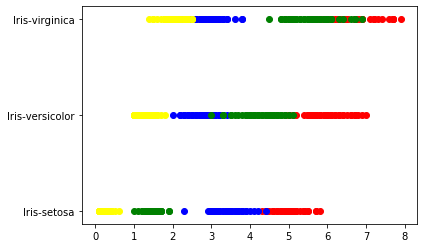

In [3]:
#scatter plot of all features wrt species type
plt.scatter(df['SepalLengthCm'], df['Species'], color='red')
plt.scatter(df['SepalWidthCm'], df['Species'], color='blue')
plt.scatter(df['PetalWidthCm'], df['Species'], color='yellow')
plt.scatter(df['PetalLengthCm'], df['Species'], color='green')
plt.show()

#### applying label encoding for the categorical column of species i.e y

In [4]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# y = DataFrame(y, columns =['Species'])

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Species'])], remainder='passthrough')
# y = np.array(ct.fit_transform(y))

# print(y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### splitting data set into train and test sets (80/20)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#### feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#always fir_transform on training set and as testing set is unseen, we'll use transform to normalise
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### training simple logistic regression model for 3 class classification

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


def trainModel(X, y, regressor):
    regressor.fit(X, y)
    B0 = regressor.intercept_.round(4)
    Bi = regressor.coef_.round(4)
    print("intercept: {}".format(B0))
    print("coefficients: {}".format(Bi))
    return (B0, Bi)

In [8]:
regressor = LogisticRegression()
B0, Bi = trainModel(X_train, y_train, regressor)
y_train_pred = regressor.predict(X_train)
train_MSE = mean_squared_error(y_train, y_train_pred)

C:\Users\Tanisha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanisha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


intercept: [-1.4907 -0.9974 -2.2875]
coefficients: [[-0.8093  1.3776 -1.5708 -1.4448]
 [ 0.3179 -1.2436  0.2803 -0.6198]
 [-0.0195 -0.1402  1.8512  2.4204]]


#### predicting class for test set

In [9]:
y_test_pred = regressor.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
print("train MSE: {} \ntest MSE: {}".format(train_MSE, test_MSE))
#test MSE is significantly higher than train MSE, we'll reduce this difference using regularisation

train MSE: 0.09166666666666666 
test MSE: 0.1


#### getting accuracy score

In [10]:
regressor.score(X_test, y_test)
# from sklearn.metrics import r2_score
# r2_train = r2_score(y_train, regressor.predict(X_train)).round(4)
# r2_test = r2_score(y_test, y_pred).round(4)
# print(r2_test)
# print(r2_train)

0.9

#### confusion matrix

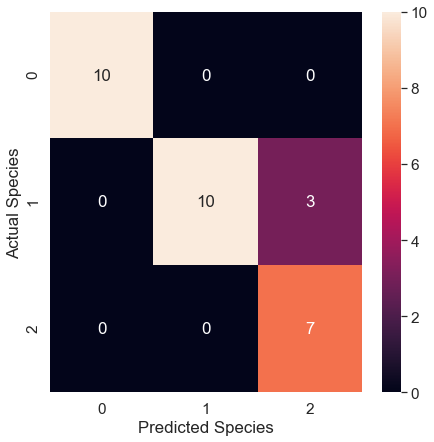

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_test_pred)
cm
plt.figure(figsize = (7, 7))
sn.set(font_scale=1.4) # for label size
cm_hm = sn.heatmap(cm, annot=True)
bottom, top = cm_hm.get_ylim()
cm_hm.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()


#### Regularization to decrease overfitting

In [12]:
#ridge regularization is default behavior for logistic regression models using sklearn, so we'll implement for lasso(l1)
#regression instead:

lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
train_MSE = mean_squared_error(y_train, y_train_pred)

y_test_pred = lr.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)

print("train MSE: {} \ntest MSE: {}".format(train_MSE, test_MSE))

train MSE: 0.058333333333333334 
test MSE: 0.03333333333333333


C:\Users\Tanisha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### accuracy after regularization

In [13]:
lr.score(X_test, y_test)

0.9666666666666667

#### confusion matrix after regularization

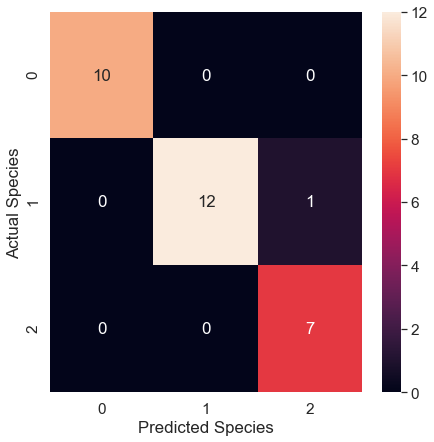

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_test_pred)
cm
plt.figure(figsize = (7, 7))
sn.set(font_scale=1.4) # for label size
cm_hm = sn.heatmap(cm, annot=True)
bottom, top = cm_hm.get_ylim()
cm_hm.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()
